# Hafta 1
* Platform ve kaynak tanıtımı
* Temel kavramlar
* YSA giriş ve tarihçe

# Hafta 2 Perceptron ve YSA Uygulaması


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("2_diabetes.csv")

In [2]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)

In [5]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [7]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (614, 8)
x_test (154, 8)
y_train (614,)
y_test (154,)


In [8]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [9]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (614, 8)
x_test (154, 8)
y_train (614, 1)
y_test (154, 1)


In [10]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

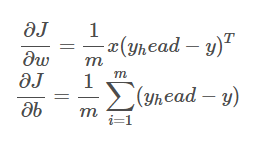

In [11]:
def forward_backward_propagation(w,b,x_train,y_train):
    z=np.dot(x_train,w)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[0]
    
    #backward propagation
    derivative_weight=(np.dot(x_train.T,((y_head-y_train))))/x_train.shape[0]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[0]
    
    gradients={"derivative_weights":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost,gradients

In [12]:
def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
#     her adımda ve her 10 adımda costları depolamak için list oluşturduk
    cost_list=[]
    cost_list2=[]
#     iterasyon sayısını saklamak için list oluşturduk
    index=[]
    
    for i in range(number_of_iteration):
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w=w-learning_rate * gradients["derivative_weights"]
        b=b-learning_rate*gradients["derivative_bias"]
        
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("iterasyon %i sonrası cost: %f" %(i,cost))
    
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("İterasyon sayısı")
    plt.ylabel("Cost değeri")
    plt.show()
    return parameters,gradients,cost_list

In [13]:
def predict(w,b,x_test):
    z=sigmoid(np.dot(x_test,w)+b)
    y_pred=np.zeros((x_test.shape[0],1))
    
    for i in range(z.shape[0]):
        if z[i,0]<=0.5:
            y_pred[i,0]=0
        else:
            y_pred[i,0]=1
            
    return y_pred

In [14]:
def lg(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[1]
    w,b=initialize_weights_and_bias(dimension)
    
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    
    return y_prediction_test,y_test

iterasyon 0 sonrası cost: 0.695919
iterasyon 10 sonrası cost: 0.639790
iterasyon 20 sonrası cost: 0.624713
iterasyon 30 sonrası cost: 0.611737
iterasyon 40 sonrası cost: 0.600491
iterasyon 50 sonrası cost: 0.590679
iterasyon 60 sonrası cost: 0.582057
iterasyon 70 sonrası cost: 0.574433
iterasyon 80 sonrası cost: 0.567649
iterasyon 90 sonrası cost: 0.561576
iterasyon 100 sonrası cost: 0.556111
iterasyon 110 sonrası cost: 0.551169
iterasyon 120 sonrası cost: 0.546679
iterasyon 130 sonrası cost: 0.542583
iterasyon 140 sonrası cost: 0.538831
iterasyon 150 sonrası cost: 0.535383
iterasyon 160 sonrası cost: 0.532204
iterasyon 170 sonrası cost: 0.529263
iterasyon 180 sonrası cost: 0.526536
iterasyon 190 sonrası cost: 0.524000
iterasyon 200 sonrası cost: 0.521636
iterasyon 210 sonrası cost: 0.519428
iterasyon 220 sonrası cost: 0.517361
iterasyon 230 sonrası cost: 0.515422
iterasyon 240 sonrası cost: 0.513600
iterasyon 250 sonrası cost: 0.511885
iterasyon 260 sonrası cost: 0.510269
iterasyon 27

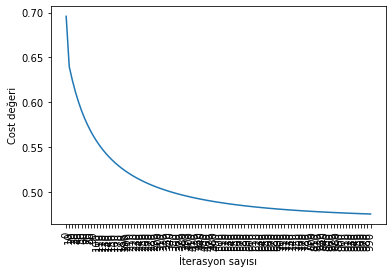

In [15]:
y_pred,y_true=lg(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=1000)

In [16]:
from sklearn.metrics import accuracy_score
print("acc:",accuracy_score(y_true,y_pred))

acc: 0.7727272727272727


In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train.ravel())
score=lr.score(x_test,y_test)
print(score)

0.7727272727272727


# Hafta 3 Transfer ve aktivasyon fonksiyonları 

iterasyon 0 sonrası cost: 0.695919
iterasyon 10 sonrası cost: 0.648386
iterasyon 20 sonrası cost: 0.639822
iterasyon 30 sonrası cost: 0.632007
iterasyon 40 sonrası cost: 0.624766
iterasyon 50 sonrası cost: 0.618048
iterasyon 60 sonrası cost: 0.611802
iterasyon 70 sonrası cost: 0.605988
iterasyon 80 sonrası cost: 0.600564
iterasyon 90 sonrası cost: 0.595497
iterasyon 100 sonrası cost: 0.590755
iterasyon 110 sonrası cost: 0.586310
iterasyon 120 sonrası cost: 0.582135
iterasyon 130 sonrası cost: 0.578209
iterasyon 140 sonrası cost: 0.574511
iterasyon 150 sonrası cost: 0.571021
iterasyon 160 sonrası cost: 0.567725
iterasyon 170 sonrası cost: 0.564605
iterasyon 180 sonrası cost: 0.561650
iterasyon 190 sonrası cost: 0.558846
iterasyon 200 sonrası cost: 0.556182
iterasyon 210 sonrası cost: 0.553649
iterasyon 220 sonrası cost: 0.551238
iterasyon 230 sonrası cost: 0.548939
iterasyon 240 sonrası cost: 0.546745
iterasyon 250 sonrası cost: 0.544649
iterasyon 260 sonrası cost: 0.542646
iterasyon 27

iterasyon 2360 sonrası cost: 0.473574
iterasyon 2370 sonrası cost: 0.473539
iterasyon 2380 sonrası cost: 0.473504
iterasyon 2390 sonrası cost: 0.473469
iterasyon 2400 sonrası cost: 0.473435
iterasyon 2410 sonrası cost: 0.473402
iterasyon 2420 sonrası cost: 0.473368
iterasyon 2430 sonrası cost: 0.473336
iterasyon 2440 sonrası cost: 0.473303
iterasyon 2450 sonrası cost: 0.473271
iterasyon 2460 sonrası cost: 0.473240
iterasyon 2470 sonrası cost: 0.473208
iterasyon 2480 sonrası cost: 0.473178
iterasyon 2490 sonrası cost: 0.473147
iterasyon 2500 sonrası cost: 0.473117
iterasyon 2510 sonrası cost: 0.473088
iterasyon 2520 sonrası cost: 0.473058
iterasyon 2530 sonrası cost: 0.473029
iterasyon 2540 sonrası cost: 0.473001
iterasyon 2550 sonrası cost: 0.472973
iterasyon 2560 sonrası cost: 0.472945
iterasyon 2570 sonrası cost: 0.472917
iterasyon 2580 sonrası cost: 0.472890
iterasyon 2590 sonrası cost: 0.472863
iterasyon 2600 sonrası cost: 0.472837
iterasyon 2610 sonrası cost: 0.472811
iterasyon 26

iterasyon 4660 sonrası cost: 0.470798
iterasyon 4670 sonrası cost: 0.470796
iterasyon 4680 sonrası cost: 0.470793
iterasyon 4690 sonrası cost: 0.470791
iterasyon 4700 sonrası cost: 0.470788
iterasyon 4710 sonrası cost: 0.470786
iterasyon 4720 sonrası cost: 0.470783
iterasyon 4730 sonrası cost: 0.470781
iterasyon 4740 sonrası cost: 0.470779
iterasyon 4750 sonrası cost: 0.470776
iterasyon 4760 sonrası cost: 0.470774
iterasyon 4770 sonrası cost: 0.470772
iterasyon 4780 sonrası cost: 0.470770
iterasyon 4790 sonrası cost: 0.470767
iterasyon 4800 sonrası cost: 0.470765
iterasyon 4810 sonrası cost: 0.470763
iterasyon 4820 sonrası cost: 0.470761
iterasyon 4830 sonrası cost: 0.470759
iterasyon 4840 sonrası cost: 0.470757
iterasyon 4850 sonrası cost: 0.470755
iterasyon 4860 sonrası cost: 0.470753
iterasyon 4870 sonrası cost: 0.470751
iterasyon 4880 sonrası cost: 0.470749
iterasyon 4890 sonrası cost: 0.470747
iterasyon 4900 sonrası cost: 0.470745
iterasyon 4910 sonrası cost: 0.470743
iterasyon 49

iterasyon 6840 sonrası cost: 0.470582
iterasyon 6850 sonrası cost: 0.470582
iterasyon 6860 sonrası cost: 0.470582
iterasyon 6870 sonrası cost: 0.470582
iterasyon 6880 sonrası cost: 0.470581
iterasyon 6890 sonrası cost: 0.470581
iterasyon 6900 sonrası cost: 0.470581
iterasyon 6910 sonrası cost: 0.470581
iterasyon 6920 sonrası cost: 0.470580
iterasyon 6930 sonrası cost: 0.470580
iterasyon 6940 sonrası cost: 0.470580
iterasyon 6950 sonrası cost: 0.470580
iterasyon 6960 sonrası cost: 0.470580
iterasyon 6970 sonrası cost: 0.470579
iterasyon 6980 sonrası cost: 0.470579
iterasyon 6990 sonrası cost: 0.470579
iterasyon 7000 sonrası cost: 0.470579
iterasyon 7010 sonrası cost: 0.470578
iterasyon 7020 sonrası cost: 0.470578
iterasyon 7030 sonrası cost: 0.470578
iterasyon 7040 sonrası cost: 0.470578
iterasyon 7050 sonrası cost: 0.470578
iterasyon 7060 sonrası cost: 0.470577
iterasyon 7070 sonrası cost: 0.470577
iterasyon 7080 sonrası cost: 0.470577
iterasyon 7090 sonrası cost: 0.470577
iterasyon 71

iterasyon 9020 sonrası cost: 0.470559
iterasyon 9030 sonrası cost: 0.470559
iterasyon 9040 sonrası cost: 0.470559
iterasyon 9050 sonrası cost: 0.470559
iterasyon 9060 sonrası cost: 0.470559
iterasyon 9070 sonrası cost: 0.470559
iterasyon 9080 sonrası cost: 0.470559
iterasyon 9090 sonrası cost: 0.470559
iterasyon 9100 sonrası cost: 0.470559
iterasyon 9110 sonrası cost: 0.470559
iterasyon 9120 sonrası cost: 0.470559
iterasyon 9130 sonrası cost: 0.470559
iterasyon 9140 sonrası cost: 0.470559
iterasyon 9150 sonrası cost: 0.470559
iterasyon 9160 sonrası cost: 0.470559
iterasyon 9170 sonrası cost: 0.470559
iterasyon 9180 sonrası cost: 0.470559
iterasyon 9190 sonrası cost: 0.470559
iterasyon 9200 sonrası cost: 0.470559
iterasyon 9210 sonrası cost: 0.470559
iterasyon 9220 sonrası cost: 0.470559
iterasyon 9230 sonrası cost: 0.470559
iterasyon 9240 sonrası cost: 0.470559
iterasyon 9250 sonrası cost: 0.470559
iterasyon 9260 sonrası cost: 0.470559
iterasyon 9270 sonrası cost: 0.470559
iterasyon 92

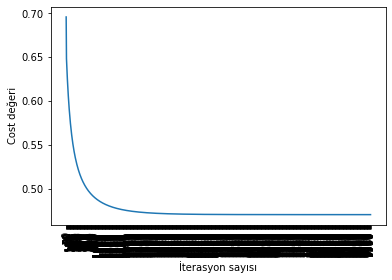

acc: 0.7792207792207793


In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("2_diabetes.csv")

y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head=1/(1+np.exp(-z)) #sigmoid
    #y_head=np.heaviside(z,1) # binary step
    #y_head=z # linear
    #y_head=(np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z)) #tanh
    #y_head=np.maximum(0.0,z) #relu
    #y_head=np.where(z>0,z,z*0.01) #leaky relu
    #y_head=np.log(1+np.exp(z)) # softplus
    #y_head=np.exp(z)/np.sum(np.exp(z)) #softmax
    
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    z=np.dot(x_train,w)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[0]
    
    #backward propagation
    derivative_weight=(np.dot(x_train.T,((y_head-y_train))))/x_train.shape[0]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[0]
    
    gradients={"derivative_weights":derivative_weight,"derivative_bias":derivative_bias}
    
    return cost,gradients

def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
#     her adımda ve her 10 adımda costları depolamak için list oluşturduk
    cost_list=[]
    cost_list2=[]
#     iterasyon sayısını saklamak için list oluşturduk
    index=[]
    
    for i in range(number_of_iteration):
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w=w-learning_rate * gradients["derivative_weights"]
        b=b-learning_rate*gradients["derivative_bias"]
        
        if i%10==0:
            cost_list2.append(cost)
            index.append(i)
            print("iterasyon %i sonrası cost: %f" %(i,cost))
    
    parameters={"weight":w,"bias":b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("İterasyon sayısı")
    plt.ylabel("Cost değeri")
    plt.show()
    return parameters,gradients,cost_list

def predict(w,b,x_test):
    z=sigmoid(np.dot(x_test,w)+b)
    y_pred=np.zeros((x_test.shape[0],1))
    
    for i in range(z.shape[0]):
        if z[i,0]<=0.5:
            y_pred[i,0]=0
        else:
            y_pred[i,0]=1
            
    return y_pred

def lg(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[1]
    w,b=initialize_weights_and_bias(dimension)
    
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    
    return y_prediction_test,y_test

y_pred,y_true=lg(x_train,y_train,x_test,y_test,learning_rate=1,num_iterations=1000)

from sklearn.metrics import accuracy_score
print("acc:",accuracy_score(y_true,y_pred))

# Hafta 4 MLP Uygulaması

## Diyabet veri seti

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("2_diabetes.csv")

y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [13]:
from sklearn.neural_network import MLPClassifier

mlpc_model=MLPClassifier()
mlpc_model.fit(x_train,y_train)

c:\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [14]:
print("score=",mlpc_model.score(x_test,y_test))

score= 0.7727272727272727


In [15]:
MLPClassifier()

MLPClassifier()

In [18]:
mlpc=MLPClassifier(solver="lbfgs",activation="logistic",hidden_layer_sizes=(3,5),random_state=1,max_iter=1000)
mlpc.fit(x_train,y_train)
print("score:",mlpc.score(x_test,y_test))

score: 0.8051948051948052


## İşaret dili

In [19]:
import numpy as np
import pandas as pd

In [20]:
X=np.load("X.npy")
y=np.load("Y.npy")

In [21]:
X.shape

(2062, 64, 64)

In [22]:
nsamples,nx,ny=X.shape
x=X.reshape((nsamples,nx*ny))

In [23]:
print(x.shape)
print(y.shape)

(2062, 4096)
(2062, 10)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(solver="adam",activation="relu",max_iter=2000,hidden_layer_sizes=(100,100,100),random_state=1)
mlpc.fit(x_train,y_train)
print("score:",mlpc.score(x_test,y_test))

score: 0.7699757869249395


# Hafta 5 Modelin optimize edilmesi

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore",category=ConvergenceWarning)

df=pd.read_csv("5_fetal_health.csv")

In [7]:
df.fetal_health=[each-1 for each in df.fetal_health]
y=df.fetal_health
x_data=df.drop(["fetal_health"],axis=1)
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
mlp=MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

In [10]:
y_pred=mlp.predict(x_test)
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       326
         1.0       0.71      0.68      0.69        68
         2.0       0.84      0.66      0.74        32

    accuracy                           0.89       426
   macro avg       0.83      0.77      0.79       426
weighted avg       0.89      0.89      0.89       426



## K-fold cross validation

In [12]:
df=pd.read_csv("5_fetal_health.csv")
df.fetal_health=[each-1 for each in df.fetal_health]
y=df.fetal_health.values
x_data=df.drop(["fetal_health"],axis=1).values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


from sklearn.model_selection import KFold

kf=KFold(n_splits=5)
mlp=MLPClassifier()
accler=[]
for train_indexler,test_indexler in kf.split(x):
    print("------- iterasyon başlangıcı -----------")
    mlp.fit(x[train_indexler],y[train_indexler])
    y_pred=mlp.predict(x[test_indexler])
    cr=classification_report(y[test_indexler],y_pred)
    acc=accuracy_score(y[test_indexler],y_pred)
    accler.append(acc)
    print(cr)
    
for i in accler:
    print(i)

print("mean acc:",np.mean(accler))
    
    

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.72      1.00      0.84       246
         1.0       0.75      0.37      0.50       141
         2.0       0.94      0.41      0.57        39

    accuracy                           0.73       426
   macro avg       0.81      0.59      0.63       426
weighted avg       0.75      0.73      0.70       426

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89       279
         1.0       0.66      0.46      0.54       104
         2.0       0.80      0.48      0.60        42

    accuracy                           0.79       425
   macro avg       0.76      0.63      0.68       425
weighted avg       0.78      0.79      0.77       425

------- iterasyon başlangıcı -----------


c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python38\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       416
         1.0       0.80      1.00      0.89         8
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99       425
   macro avg       0.60      0.67      0.63       425
weighted avg       0.99      0.99      0.99       425

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       375
         1.0       0.55      0.16      0.25        37
         2.0       0.36      0.77      0.49        13

    accuracy                           0.87       425
   macro avg       0.61      0.62      0.56       425
weighted avg       0.87      0.87      0.86       425

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       339
         1.0       0.08      1.00      0.15    

## Shuffle split

In [13]:
df=pd.read_csv("5_fetal_health.csv")
df.fetal_health=[each-1 for each in df.fetal_health]
y=df.fetal_health.values
x_data=df.drop(["fetal_health"],axis=1).values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


from sklearn.model_selection import ShuffleSplit

sf=ShuffleSplit(n_splits=5,test_size=0.20)
mlp=MLPClassifier()
accler=[]
for train_indexler,test_indexler in sf.split(x):
    print("------- iterasyon başlangıcı -----------")
    mlp.fit(x[train_indexler],y[train_indexler])
    y_pred=mlp.predict(x[test_indexler])
    cr=classification_report(y[test_indexler],y_pred)
    acc=accuracy_score(y[test_indexler],y_pred)
    accler.append(acc)
    print(cr)
    
for i in accler:
    print(i)

print("mean acc:",np.mean(accler))
    

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       334
         1.0       0.48      0.57      0.52        53
         2.0       0.86      0.62      0.72        39

    accuracy                           0.85       426
   macro avg       0.75      0.70      0.72       426
weighted avg       0.86      0.85      0.85       426

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       326
         1.0       0.63      0.45      0.53        53
         2.0       0.86      0.68      0.76        47

    accuracy                           0.87       426
   macro avg       0.80      0.70      0.74       426
weighted avg       0.86      0.87      0.86       426

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       334
      

## Stratified k-fold

In [15]:
df=pd.read_csv("5_fetal_health.csv")
df.fetal_health=[each-1 for each in df.fetal_health]
y=df.fetal_health.values
x_data=df.drop(["fetal_health"],axis=1).values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=5)
mlp=MLPClassifier()
accler=[]
for train_indexler,test_indexler in skf.split(x,y):
    print("------- iterasyon başlangıcı -----------")
    mlp.fit(x[train_indexler],y[train_indexler])
    y_pred=mlp.predict(x[test_indexler])
    cr=classification_report(y[test_indexler],y_pred)
    acc=accuracy_score(y[test_indexler],y_pred)
    accler.append(acc)
    print(cr)
    
for i in accler:
    print(i)

print("mean acc:",np.mean(accler))
    

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       331
         1.0       0.52      0.54      0.53        59
         2.0       0.92      0.33      0.49        36

    accuracy                           0.86       426
   macro avg       0.79      0.62      0.66       426
weighted avg       0.86      0.86      0.85       426

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       331
         1.0       0.56      0.76      0.65        59
         2.0       1.00      0.37      0.54        35

    accuracy                           0.86       425
   macro avg       0.83      0.69      0.71       425
weighted avg       0.89      0.86      0.86       425

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       331
      

## Stratified shuffle split

In [16]:
df=pd.read_csv("5_fetal_health.csv")
df.fetal_health=[each-1 for each in df.fetal_health]
y=df.fetal_health.values
x_data=df.drop(["fetal_health"],axis=1).values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))


from sklearn.model_selection import StratifiedShuffleSplit

sss=StratifiedShuffleSplit(n_splits=5)
mlp=MLPClassifier()
accler=[]
for train_indexler,test_indexler in sss.split(x,y):
    print("------- iterasyon başlangıcı -----------")
    mlp.fit(x[train_indexler],y[train_indexler])
    y_pred=mlp.predict(x[test_indexler])
    cr=classification_report(y[test_indexler],y_pred)
    acc=accuracy_score(y[test_indexler],y_pred)
    accler.append(acc)
    print(cr)
    
for i in accler:
    print(i)

print("mean acc:",np.mean(accler))
    

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94       166
         1.0       0.75      0.52      0.61        29
         2.0       0.87      0.72      0.79        18

    accuracy                           0.89       213
   macro avg       0.84      0.74      0.78       213
weighted avg       0.88      0.89      0.88       213

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93       166
         1.0       0.76      0.45      0.57        29
         2.0       0.75      0.67      0.71        18

    accuracy                           0.87       213
   macro avg       0.80      0.69      0.73       213
weighted avg       0.86      0.87      0.86       213

------- iterasyon başlangıcı -----------
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       166
      

## Grid search

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore",category=ConvergenceWarning)
from sklearn.model_selection import GridSearchCV

df=pd.read_csv("2_diabetes.csv")

In [18]:
y=df.Outcome.values
x_data=df.drop(["Outcome"],axis=1)

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [24]:
mlpc_params={"alpha":[0.1,0.01,0.001],
             "hidden_layer_sizes":[(10,10),(100,100),(3,5,3)],
             "solver":["lbfgs","adam","sgd"],
             "max_iter":[400,1000]
}
mlpc=MLPClassifier(activation="logistic",random_state=1)
mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [25]:
print(mlpc_cv_model.best_params_)

{'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'max_iter': 400, 'solver': 'adam'}


In [28]:
mlpc_tuned=MLPClassifier(alpha=000.1,hidden_layer_sizes=(100,100),max_iter=400,solver="lbfgs",activation="logistic",random_state=1).fit(x_train,y_train)

In [29]:
print("score",mlpc_tuned.score(x_test,y_test))

score 0.8051948051948052


## Keras versiyon kontrolü 

In [30]:
import keras
import tensorflow as tf

print("keras versiyonu:",keras.__version__)
print("tf versiyonu:",tf.__version__)

keras versiyonu: 2.6.0
tf versiyonu: 2.6.0


# Hafta 6 Derin öğrenme, keras ve colab

## Keras uygulaması

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   1000025  698 non-null    int64 
 1   5        698 non-null    int64 
 2   1        698 non-null    int64 
 3   1.1      698 non-null    int64 
 4   1.2      698 non-null    int64 
 5   2        698 non-null    int64 
 6   1.3      698 non-null    object
 7   3        698 non-null    int64 
 8   1.4      698 non-null    int64 
 9   1.5      698 non-null    int64 
 10  2.1      698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
df.head()

1000025  5   1  1.1  1.2  2 1.3  3  1.4  1.5  2.1
0  1002945  5   4    4    5  7  10  3    2    1    2
1  1015425  3   1    1    1  2   2  3    1    1    2
2  1016277  6   8    8    1  3   4  3    7    1    2
3  1017023  4   1    1    3  2   1  3    1    1    2
4  1017122  8  10   10    8  7  10  9    7    1    4

In [5]:
df.columns=["id","ct","cell_size","cell_shape","ma","single_size","bn","bc","nn","mitoses","class"]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           698 non-null    int64 
 1   ct           698 non-null    int64 
 2   cell_size    698 non-null    int64 
 3   cell_shape   698 non-null    int64 
 4   ma           698 non-null    int64 
 5   single_size  698 non-null    int64 
 6   bn           698 non-null    object
 7   bc           698 non-null    int64 
 8   nn           698 non-null    int64 
 9   mitoses      698 non-null    int64 
 10  class        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
df.replace("?",np.nan,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           698 non-null    int64 
 1   ct           698 non-null    int64 
 2   cell_size    698 non-null    int64 
 3   cell_shape   698 non-null    int64 
 4   ma           698 non-null    int64 
 5   single_size  698 non-null    int64 
 6   bn           682 non-null    object
 7   bc           698 non-null    int64 
 8   nn           698 non-null    int64 
 9   mitoses      698 non-null    int64 
 10  class        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [9]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           682 non-null    int64 
 1   ct           682 non-null    int64 
 2   cell_size    682 non-null    int64 
 3   cell_shape   682 non-null    int64 
 4   ma           682 non-null    int64 
 5   single_size  682 non-null    int64 
 6   bn           682 non-null    object
 7   bc           682 non-null    int64 
 8   nn           682 non-null    int64 
 9   mitoses      682 non-null    int64 
 10  class        682 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 63.9+ KB


In [10]:
df["bn"]=df["bn"].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 697
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           682 non-null    int64
 1   ct           682 non-null    int64
 2   cell_size    682 non-null    int64
 3   cell_shape   682 non-null    int64
 4   ma           682 non-null    int64
 5   single_size  682 non-null    int64
 6   bn           682 non-null    int32
 7   bc           682 non-null    int64
 8   nn           682 non-null    int64
 9   mitoses      682 non-null    int64
 10  class        682 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 77.4 KB


In [12]:
df.drop(["id"],inplace=True,axis=1)

In [13]:
df["class"]=[1 if each==4 else 0 for each in df["class"]]

In [14]:
df.head()

ct  cell_size  cell_shape  ma  single_size  bn  bc  nn  mitoses  class
0   5          4           4   5            7  10   3   2        1      0
1   3          1           1   1            2   2   3   1        1      0
2   6          8           8   1            3   4   3   7        1      0
3   4          1           1   3            2   1   3   1        1      0
4   8         10          10   8            7  10   9   7        1      1

In [17]:
x_data=df.drop(["class"],axis=1)
y=df["class"].values
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras.optimizers import RMSprop
from keras import metrics

In [30]:
model=Sequential()

In [31]:
x.shape

(682, 9)

In [32]:
model.add(Dense(9,activation="relu",input_shape=(9,)))
model.add(Dense(18,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.compile(optimizer=RMSprop(learning_rate=0.001),loss=keras.losses.mean_squared_error,metrics=[metrics.binary_accuracy])

In [34]:
history=model.fit(x_train,y_train,batch_size=64,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
9/9 [==============================] - 1s 42ms/step - loss: 0.2274 - binary_accuracy: 0.8495 - val_loss: 0.2190 - val_binary_accuracy: 0.8905
Epoch 2/20
9/9 [==============================] - 0s 4ms/step - loss: 0.2065 - binary_accuracy: 0.9211 - val_loss: 0.2010 - val_binary_accuracy: 0.9343
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.1879 - binary_accuracy: 0.9431 - val_loss: 0.1835 - val_binary_accuracy: 0.9343
Epoch 4/20
9/9 [==============================] - 0s 6ms/step - loss: 0.1697 - binary_accuracy: 0.9541 - val_loss: 0.1657 - val_binary_accuracy: 0.9562
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.1515 - binary_accuracy: 0.9560 - val_loss: 0.1481 - val_binary_accuracy: 0.9562
Epoch 6/20
9/9 [==============================] - 0s 6ms/step - loss: 0.1336 - binary_accuracy: 0.9578 - val_loss: 0.1306 - val_binary_accuracy: 0.9635
Epoch 7/20
9/9 [==============================] - 0s 6ms/step - loss: 0.1163 - binary_a

In [35]:
results=model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0315 - binary_accuracy: 0.9562


In [36]:
print(results)

[0.0315447673201561, 0.956204354763031]


In [37]:
import matplotlib.pyplot as plt

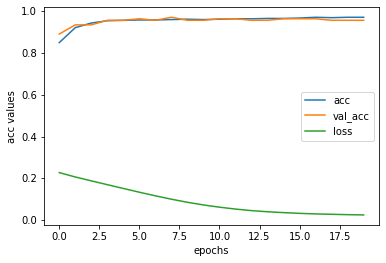

In [41]:
plt.plot(history.history["binary_accuracy"])
plt.plot(history.history["val_binary_accuracy"])
plt.plot(history.history["loss"])
plt.legend(["acc","val_acc","loss"])
plt.xlabel("epochs")
plt.ylabel("acc values")
plt.show()

## Colab tanıtımı 

# Hafta 7 Sınıflandırma ve regresyon uygulaması 

## İkili metin sınıflandırma 

### Başlangıç 

In [2]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [4]:
train_data[0]
train_labels[0]

1

In [5]:
word_index=imdb.get_word_index()

In [6]:
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])

In [7]:
decoded_review=' '.join([reverse_word_index.get(i,"?") for i in train_data[0]])

In [8]:
decoded_review

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

### Verileri ağa uygun hale getirme

In [9]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

In [11]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train=np.asarray(train_labels).astype("float32")
y_test=np.asarray(test_labels).astype("float32")

### Ağı oluşturmak

In [14]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

In [15]:
from keras import losses
from keras import metrics
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [16]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [17]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 6s 157ms/step - loss: 0.5166 - binary_accuracy: 0.7883 - val_loss: 0.3910 - val_binary_accuracy: 0.8676
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3093 - binary_accuracy: 0.9035 - val_loss: 0.3361 - val_binary_accuracy: 0.8659
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2258 - binary_accuracy: 0.9274 - val_loss: 0.2832 - val_binary_accuracy: 0.8877
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1771 - binary_accuracy: 0.9430 - val_loss: 0.2795 - val_binary_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1450 - binary_accuracy: 0.9534 - val_loss: 0.3120 - val_binary_accuracy: 0.8747
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1191 - binary_accuracy: 0.9647 - val_loss: 0.3293 - val_binary_accuracy: 0.8727
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - lo

### Sonuçları gözlemlemek 

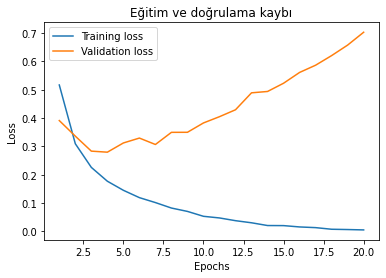

In [18]:
import matplotlib.pyplot as plt
loss_values=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title("Eğitim ve doğrulama kaybı")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


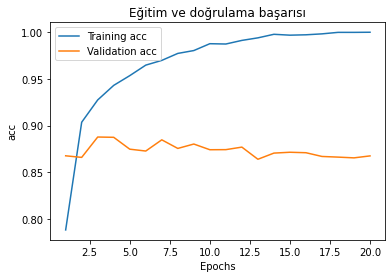

In [20]:
plt.plot(epochs,history.history["binary_accuracy"],label="Training acc")
plt.plot(epochs,history.history["val_binary_accuracy"],label="Validation acc")
plt.title("Eğitim ve doğrulama başarısı")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [21]:
model=models.Sequential()
model.add(layers.Dense(16,activation="relu",input_shape=(10000,)))
model.add(layers.Dense(16,activation="relu"))
model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer=RMSprop(learning_rate=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

history=model.fit(partial_x_train,partial_y_train,epochs=4,batch_size=512,validation_data=(x_val,y_val))

results=model.evaluate(x_test,y_test)

Epoch 1/4
30/30 [==============================] - 2s 38ms/step - loss: 0.5167 - binary_accuracy: 0.7999 - val_loss: 0.4013 - val_binary_accuracy: 0.8529
Epoch 2/4
30/30 [==============================] - 1s 25ms/step - loss: 0.3133 - binary_accuracy: 0.9009 - val_loss: 0.3112 - val_binary_accuracy: 0.8831
Epoch 3/4
30/30 [==============================] - 1s 23ms/step - loss: 0.2302 - binary_accuracy: 0.9245 - val_loss: 0.2791 - val_binary_accuracy: 0.8902
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2898 - binary_accuracy: 0.8830


In [22]:
print(results)

[0.2897798717021942, 0.8829600214958191]


# Hafta 8 Fiyat tahmini

## Başlangıç

In [2]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_targets.shape

(404,)

In [5]:
test_data.shape

(102, 13)

## Verileri ağa uygun hale getirme 

In [6]:
mean=train_data.mean(axis=0)
train_data-=mean

std=train_data.std(axis=0)
train_data/=std

test_data-=mean
test_data/=std

## Ağı oluşturmak

In [7]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(1))
    model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
    return model

In [9]:
model=build_model()
history=model.fit(train_data,train_targets,epochs=100,batch_size=1,validation_data=(test_data,test_targets))

Epoch 1/100
404/404 [==============================] - 2s 2ms/step - loss: 165.5023 - mae: 9.0239 - val_loss: 31.8138 - val_mae: 4.2775
Epoch 2/100
404/404 [==============================] - 1s 2ms/step - loss: 24.0845 - mae: 3.2661 - val_loss: 20.9049 - val_mae: 3.4323
Epoch 3/100
404/404 [==============================] - 1s 2ms/step - loss: 17.1367 - mae: 2.8591 - val_loss: 21.1854 - val_mae: 3.2741
Epoch 4/100
404/404 [==============================] - 1s 2ms/step - loss: 15.6292 - mae: 2.6176 - val_loss: 19.6974 - val_mae: 3.0386
Epoch 5/100
404/404 [==============================] - 1s 2ms/step - loss: 12.9810 - mae: 2.4458 - val_loss: 19.8841 - val_mae: 3.0097
Epoch 6/100
404/404 [==============================] - 1s 2ms/step - loss: 12.7032 - mae: 2.3844 - val_loss: 18.5904 - val_mae: 2.8630
Epoch 7/100
404/404 [==============================] - 1s 2ms/step - loss: 12.1617 - mae: 2.3490 - val_loss: 19.7465 - val_mae: 2.7986
Epoch 8/100
404/404 [==============================] -

In [10]:
results=model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 10ms/step - loss: 13.4796 - mae: 2.4131


In [11]:
print(results)

[13.479557037353516, 2.413073778152466]


## Sonuçları görmek 

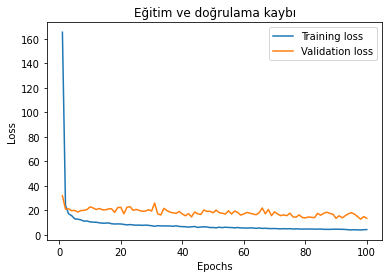

In [12]:
import matplotlib.pyplot as plt

loss_values=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,label="Training loss")
plt.plot(epochs,val_loss,label="Validation loss")
plt.title("Eğitim ve doğrulama kaybı")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

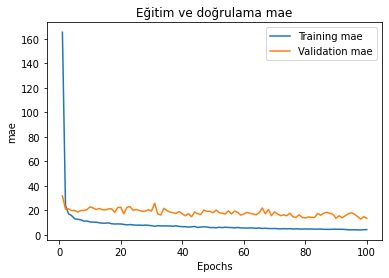

In [13]:
mae_values=history.history["mae"]
val_mae=history.history["val_mae"]
epochs=range(1,len(loss_values)+1)

plt.plot(epochs,loss_values,label="Training mae")
plt.plot(epochs,val_loss,label="Validation mae")
plt.title("Eğitim ve doğrulama mae")
plt.xlabel("Epochs")
plt.ylabel("mae")
plt.legend()
plt.show()

## Makine öğrenmesi iş akışı

# Hafta 9 Sınav haftası

# Hafta 10 Sunum haftası

# Hafta 11 CNN

## Verilerin hazırlanması

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
x=np.load("X.npy")
y=np.load("Y.npy")

In [5]:
print(x.shape)

(2062, 64, 64, 1)


In [7]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,shuffle=True)

In [8]:
input_shape=x_train.shape[1:]
print(input_shape)

(64, 64, 1)


## Ağın inşa edilmesi

In [9]:
model=Sequential()
model.add(Conv2D(16,kernel_size=3,activation="relu",padding="same",input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=3,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(64,kernel_size=3,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(128,kernel_size=3,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Conv2D(256,kernel_size=3,activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.2))    

model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [10]:
#model.summary()

In [11]:
model.compile(optimizer="rmsprop",loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
egitim=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
52/52 [==============================] - 11s 178ms/step - loss: 1.8925 - accuracy: 0.5676 - val_loss: 2.8738 - val_accuracy: 0.0896
Epoch 2/10
52/52 [==============================] - 9s 174ms/step - loss: 0.3390 - accuracy: 0.8799 - val_loss: 2.9100 - val_accuracy: 0.0896
Epoch 3/10
52/52 [==============================] - 9s 172ms/step - loss: 0.1936 - accuracy: 0.9357 - val_loss: 2.7933 - val_accuracy: 0.1598
Epoch 4/10
52/52 [==============================] - 9s 175ms/step - loss: 0.1227 - accuracy: 0.9563 - val_loss: 2.5054 - val_accuracy: 0.2155
Epoch 5/10
52/52 [==============================] - 9s 176ms/step - loss: 0.0894 - accuracy: 0.9721 - val_loss: 2.4496 - val_accuracy: 0.2203
Epoch 6/10
52/52 [==============================] - 9s 174ms/step - loss: 0.0724 - accuracy: 0.9806 - val_loss: 1.7279 - val_accuracy: 0.3874
Epoch 7/10
52/52 [==============================] - 9s 175ms/step - loss: 0.0664 - accuracy: 0.9812 - val_loss: 2.6330 - val_accuracy: 0.3777
Epoch

## Sonuçları gözlemlemek 

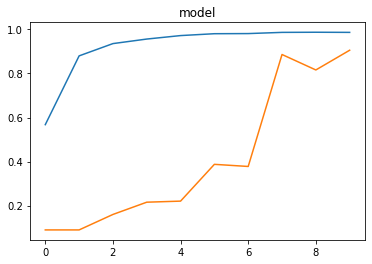

In [13]:
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
plt.title("model")
plt.show()

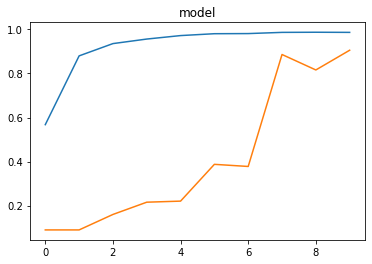

In [14]:
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
plt.title("model")
plt.show()

In [15]:
import sklearn.metrics as metrics

y_pred=model.predict(x_test)

In [16]:
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

In [17]:
acc=metrics.accuracy_score(y_true,y_pred)
print(acc)

0.9055690072639225


In [18]:
cm=metrics.confusion_matrix(y_true,y_pred)
print(cm)

[[38  1  0  0  0  0  0  0  0  1]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  1 38  0  0  0  0  1  0  0]
 [ 0  0  0 40  0  0  0  0  0  2]
 [ 0  0  0  0 41  0  0  0  1  0]
 [ 0  0  0  0  2 42  0  0  0  0]
 [ 0  0  0  0 10  0 22  3  0  2]
 [ 0  0  1  0  1  0  0 35  5  0]
 [ 0  0  0  0  0  0  0  0 39  8]
 [ 0  0  0  0  0  0  0  0  0 35]]


In [19]:
import seaborn as sns

<AxesSubplot:>

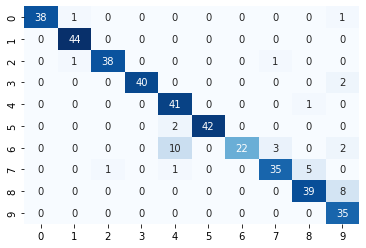

In [20]:
sns.heatmap(cm,annot=True,fmt="",cmap="Blues",cbar=False)

<AxesSubplot:>

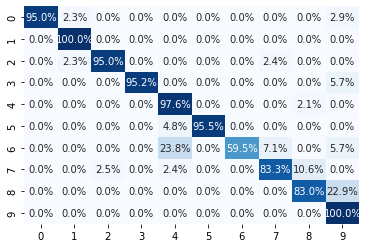

In [21]:
sns.heatmap(cm/cm.sum(axis=1),annot=True,fmt=".1%",cmap="Blues",cbar=False)

# Hafta 12 Bayram haftası

# Hafta 13 CNN 2

## Modelin kaydedilmesi ve tekrar yüklenmesi

In [22]:
model.save("isaretdili.h5")

In [23]:
from keras.models import load_model

In [24]:
model=load_model("isaretdili.h5")

In [25]:
import cv2

In [29]:
xpred_images=[]
imgs=["0.PNG","1.PNG","2.PNG","4.PNG","5.PNG","8.PNG","8_.PNG","9.PNG"]
for im in imgs:
    image=cv2.imread("numbers/"+im,0)
    image=cv2.resize(image,(64,64))
    xpred_images.append(image)


In [30]:
xpred_images=np.array(xpred_images).astype("float32")
xpred_images=xpred_images/255.0

In [31]:
np.save("x_pred",xpred_images)

In [32]:
x_p=np.load("x_pred.npy")
print(x_p.shape)

(8, 64, 64)


In [33]:
x_p_re=x_p.reshape(-1,64,64,1)
print(x_p_re.shape)

(8, 64, 64, 1)


In [34]:
pred=model.predict(x_p_re)
print(pred)

[[9.9642986e-01 7.9600657e-05 6.2800567e-08 1.4896938e-08 1.0017773e-07
  2.3753384e-09 5.7067604e-07 1.6412297e-06 3.2557850e-03 2.3245988e-04]
 [1.3303636e-09 9.9998021e-01 1.8144699e-05 1.2985721e-07 1.8703664e-11
  4.9296929e-12 8.2618651e-10 1.0222199e-06 2.1095964e-07 2.1212855e-07]
 [1.8547932e-09 6.8992988e-04 9.9925357e-01 1.9902580e-05 1.6893755e-09
  1.5599766e-11 3.3426935e-05 1.5984571e-06 1.4914683e-06 1.2210389e-08]
 [6.5524939e-05 9.6685430e-03 3.2999599e-04 1.3429205e-03 1.0856901e-01
  7.3144096e-04 4.1963646e-04 2.8600392e-04 7.6330230e-02 8.0225670e-01]
 [4.8587343e-04 1.7692192e-04 3.7801880e-04 5.4881646e-09 1.5501319e-04
  6.9752168e-08 4.0519444e-05 6.7473156e-05 3.7885172e-06 9.9869233e-01]
 [6.3459299e-07 2.3188863e-04 3.0587747e-05 5.9667625e-03 3.0572613e-04
  4.0574618e-05 1.3857349e-04 5.4424914e-04 1.6410021e-01 8.2864082e-01]
 [1.3713855e-05 3.2935914e-02 6.0594094e-04 7.0287824e-06 4.3117675e-06
  2.6805981e-07 1.5676926e-05 2.2075060e-03 8.3854032e-01 

In [35]:
y_pred_n=np.argmax(pred,axis=1)
print(y_pred_n)

[0 1 2 9 9 9 8 9]
